In [1]:
import pandas as pd 
import sys
# exe_easyplot_path = r'C:\Users\wande\OneDrive\Documentos\GitHub\EASYPLOTPYDEV\easyplot_toolbox'
exe_easyplot_path = '/home/nero/git-hub projects/EASYPLOTPYDEV/EASYPLOT_TOOLBOX/'
sys.path.append(exe_easyplot_path)
from easyplot import *
from easyplot_toolbox import *



Matplotlib interactive mode is currently OFF. It is recommended to use a suitable matplotlib backend and turn it on by calling matplotlib.pyplot.ion()



In [2]:
# Leitura do dataset
DF_ARGAMASSA = pd.read_excel('dadosres1.xlsx')

DF_ARGAMASSA.head()

ID.  traço     Ci     Ca      NA   AR    RBMG  Adi     Ag  Cura  Res  \
0    1  kg/m³  384.3  531.0  2350.0  0.0    0.00  0.0  648.0    28  3.5   
1    1  kg/m³  384.3  531.0  2230.0  0.0  117.45  0.0  648.0    28  5.0   
2    1  kg/m³  384.3  531.0  2110.0  0.0  234.40  0.0  648.0    28  6.2   
3    1  kg/m³  384.3  531.0  2000.0  0.0  352.30  0.0  648.0    28  5.6   
4    1  kg/m³  384.3  531.0  2350.0  0.0    0.00  0.0  648.0     7  2.5   

                                  Ref Tipo publi.    Pais  \
0  Silva Neto, Brites e Santos (2016)         TCC  BRASIL   
1  Silva Neto, Brites e Santos (2016)         TCC  BRASIL   
2  Silva Neto, Brites e Santos (2016)         TCC  BRASIL   
3  Silva Neto, Brites e Santos (2016)         TCC  BRASIL   
4  Silva Neto, Brites e Santos (2016)         TCC  BRASIL   

                                                 End  
0  https://xdocs.com.br/download/rbmg-argamassa-c...  
1  https://xdocs.com.br/download/rbmg-argamassa-c...  
2  https://xdocs.com.br/download/rbmg-argamassa-c...  
3  https://xdocs.com.br/download/rbmg-argamassa-c...  
4  https://xdocs.com.br/download/rbmg-argamassa-c...

In [3]:
DF_TRATADO = DF_ARGAMASSA.copy()

# Execução da limpeza 
DF_TRATADO = DF_TRATADO.drop(columns = 'Ref')
DF_TRATADO = DF_TRATADO.drop_duplicates()

# Criação da coluna relação água cimento (a per c) e eliminação do atributo água ('Ag')
DF_TRATADO['w-c'] = DF_TRATADO['Ag'] / DF_TRATADO['Ci'] 
#Remoção das colunas inúteis para o trabalho
DF_TRATADO = DF_TRATADO.drop(columns = ['Ag','Pais','Tipo publi.','End','traço','ID.'])

first_column = DF_TRATADO.pop('Res')

DF_TRATADO.insert(8, 'Res', first_column)

DF_TRATADO.head()

Ci     Ca      NA   AR    RBMG  Adi  Cura       w-c  Res
0  384.3  531.0  2350.0  0.0    0.00  0.0    28  1.686183  3.5
1  384.3  531.0  2230.0  0.0  117.45  0.0    28  1.686183  5.0
2  384.3  531.0  2110.0  0.0  234.40  0.0    28  1.686183  6.2
3  384.3  531.0  2000.0  0.0  352.30  0.0    28  1.686183  5.6
4  384.3  531.0  2350.0  0.0    0.00  0.0     7  1.686183  2.5

In [4]:
DF_TRATADO.describe().transpose()

count         mean         std         min         25%          50%  \
Ci    370.0   448.748274  300.299055  136.490000  244.108508   450.000000   
Ca    370.0    52.812463  134.457940    0.000000    0.000000     0.000000   
NA    370.0  1197.580206  672.513615    0.000000  945.000000  1320.795000   
AR    370.0   301.499754  492.883460    0.000000    0.000000     0.000000   
RBMG  370.0    10.348204   38.693430    0.000000    0.000000     0.000000   
Adi   370.0     0.388536    1.377766    0.000000    0.000000     0.000000   
Cura  370.0    31.875676   33.291693    1.000000    7.000000    28.000000   
w-c   370.0     0.919628    0.618938    0.212093    0.500000     0.666667   
Res   370.0    20.632080   18.794434    0.540000    5.000000    14.465000   

              75%      max  
Ci     527.892500  2616.67  
Ca       0.000000  1338.54  
NA    1534.440000  5273.00  
AR     426.750000  2250.00  
RBMG     0.000000   352.30  
Adi      0.000000    10.60  
Cura    28.000000   360.00  
w-c      1.365995     6.00  
Res     31.875000    76.90

['Ci', 'Ca', 'NA', 'AR', 'RBMG', 'Adi', 'Cura', 'w-c', 'Res']


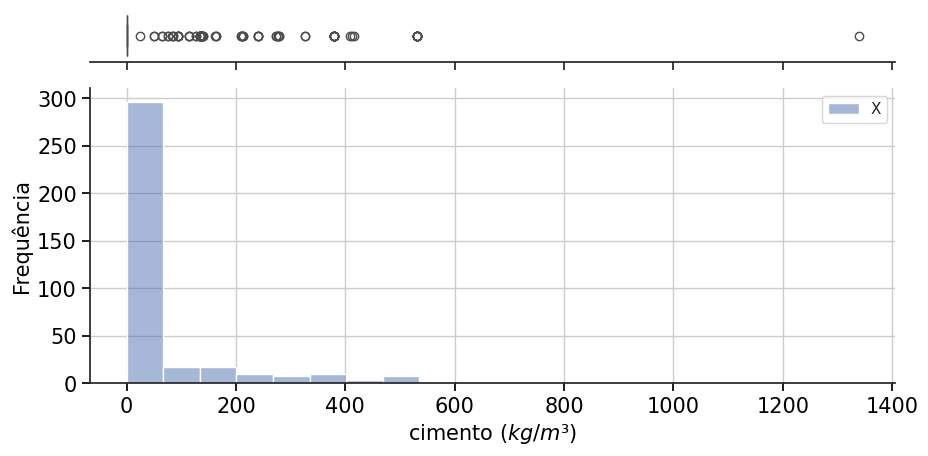

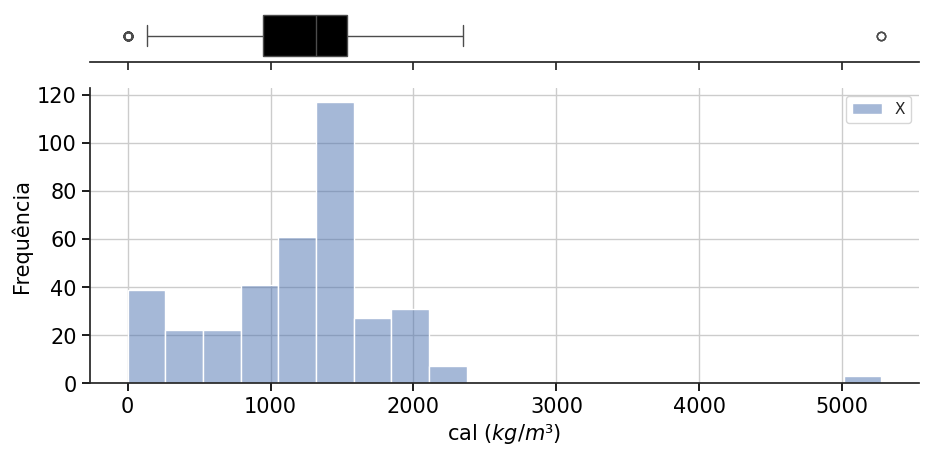

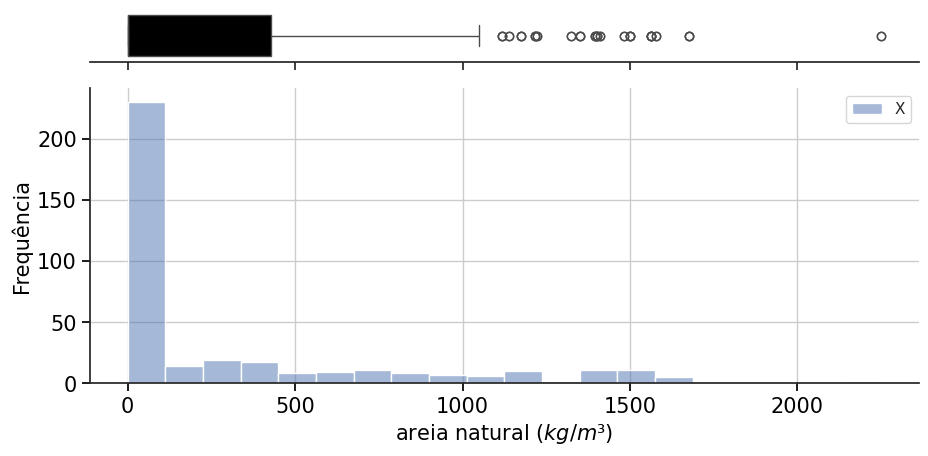

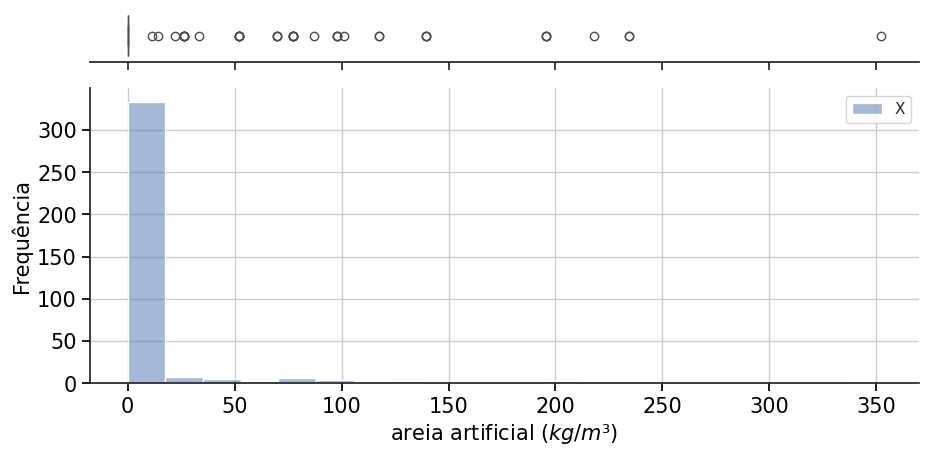

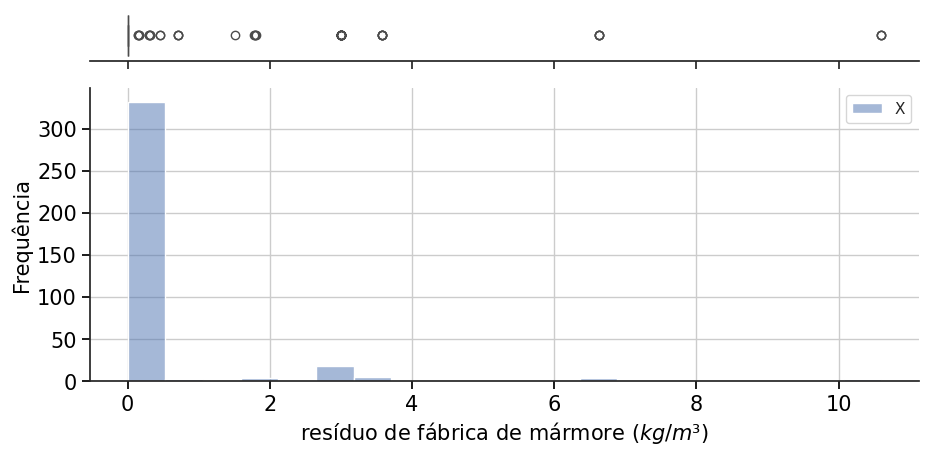

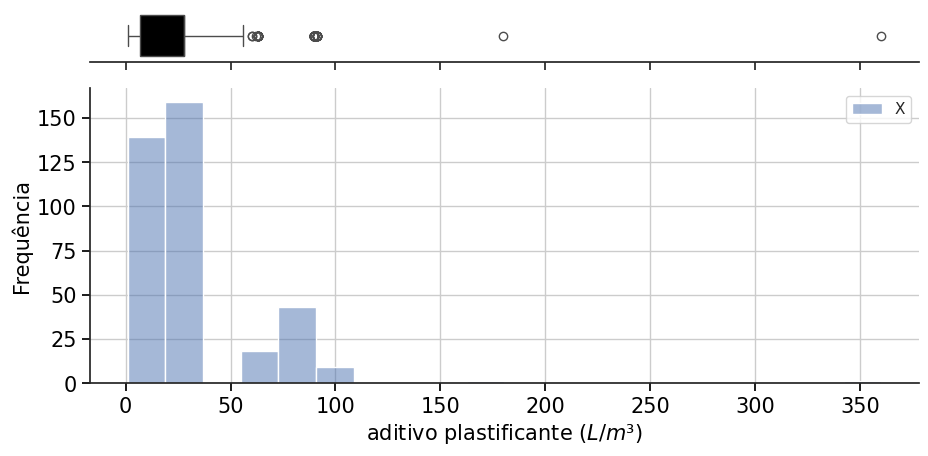

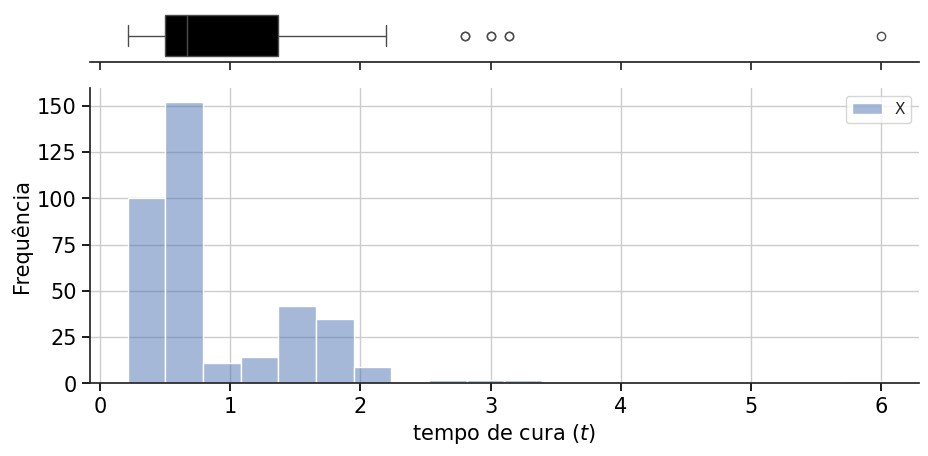

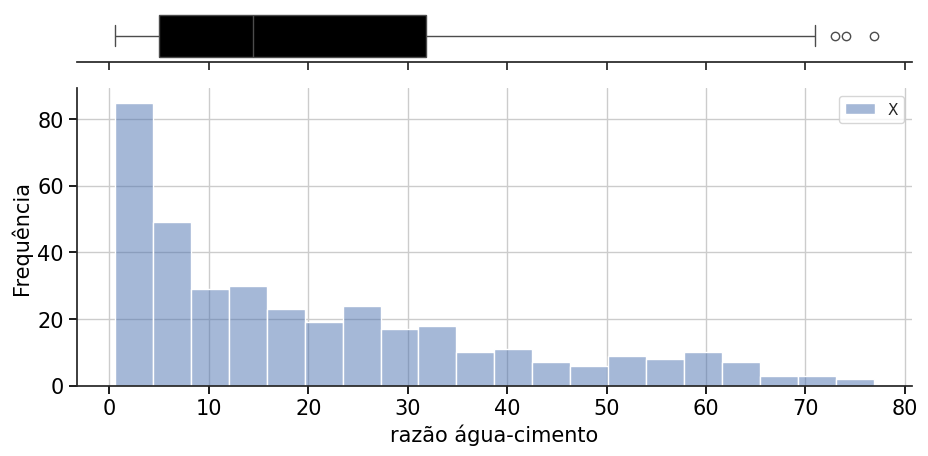

In [5]:
LISTA = ['cimento ($kg/m³$)', 
         'cal ($kg/m³$)', 
         'areia natural ($kg/m³$)', 
         'areia artificial ($kg/m³$)',
         'resíduo de fábrica de mármore ($kg/m³$)',
         'aditivo plastificante ($L/m³$)',
         'tempo de cura ($t$)',
         'razão água-cimento',
         'Força compressiva ($MPa$)',
        ]

ID = 0

colunas  =  DF_TRATADO.columns.tolist()
print(colunas)
colunas.pop(0)

for COLUMN in colunas:
    #print(COLUMN)

    PLOT_SETUP = {
        'name': f'{COLUMN}_hisp',
        'width': 24,
        'height': 12,
        'extension': 'jpg',
        'marker': 'o',
        'marker size': 1.5,
        'y axis label': 'Frequência',
        'x axis label': LISTA[ID],
        'labels size': 15,
        'labels color': '#000000',
        'chart color': '#000000',
        'x axis size': 15,
        'y axis size': 15,
        'axises color': '#000000',
        'on grid?': True,
        'loc legend': 'upper right',
        'size legend': 14,
        'y log': False,
        'x log': False,
        'bins': 20,
        'dots per inch': 600,
    }

    DATASET = {'X': DF_TRATADO[COLUMN]}
    
    histogram_chart(dataset=DATASET, plot_setup=PLOT_SETUP)
    ID += 1